# Trabajo final Grupo 3 - Digital Transformation 

### Tema seleccionado: 

+ **Elecciones Generales**

### Integrantes:

+ Fernando Martinez
+ Inmaculada Latorre
+ Fernando Lominchar
+ Andres Plazas

## Introducción 

Este trabajo tiene como objetivo analizar los datos de las elecciones generales del 2019 con enfoque en la ciudad de Madrid. Para complementar el análisis, se suman los datos del Padron municipal, discriminados por distrito y barrio. Los datos de las elecciones se obtuvieron directamente del [Ayuntamiento de Madrid](http://www-2.munimadrid.es/CSE6/control/seleccionDatos?numSerie=7010301013), al igual que los datos del [Padron Municipal](http://www-2.munimadrid.es/TSE6/control/seleccionDatosBarrio). 

Dado la complejidad de factores que pueden llegar a incidir sobre el criterio de una persona cuando se trata de ejercer el voto por uno u otro partido político, en esta ocación, únicamente se van se analizaran los siguientes puntos:

+ **1.** Realación entre los votos obtenidos por el PSOE y la edad de la población.
+ **2.** Análisis del voto en blanco, voto nulo y la abstención por distrito.
+ **3.** Cómo se distribuyen las edades en el distrito que registró la mayor participación en las elecciones.
+ **4.** Resultados electorales por porcentaje de migrantes.

Cada uno de los puntos mencionados anteriormente tendra un apartado dentro del trabajo; será posible seguir el razonamiento utilizado y observar los resultados obtenidos. 

A continuación, como primer paso previo a cualquier análisis, se muestra el proceso de limpieza y adecuación de tablas. 

## Carga de las tablas correspondientes a las elecciones

Se descargaron las 21 tablas disponibles en la pagina del Ayuntamiento de Madrid. Cada una de ellas corresponde a un distrito, y contiene la siguiente información: 

+ Distrito
+ Barrio
+ Censo electoral
+ Abstención
+ Votos blancos 
+ Votos nulos
+ Total votos_a_candidaturas 
+ CNTG+ 
+ Cs
+ FE de las JONS
+ IU-MpM
+ M.I.
+ MAS MADRID
+ MCE
+ P-LIB
+ P.C.P.E.
+ P.P.
+ P.S.O.E. 
+ PACMA
+ PCAS-TC-PPCCAL-PACTO
+ PCTE
+ PH
+ PUM+J
+ ULEG
+ UPyD
+ VOX

A continuación se observa el código implementado para leer, limpiar, y contatenar toda la información en una gran tabla: "main_table_elecciones"


In [1]:
import pandas as pd
import os
import re
import numpy as np
import math

path = "resources/Tablas_elecciones_barrio/"
files = ""    

In [2]:
tables = []
# Cargar los nombre de todos los archivos almacenados dentro de la carpeta "resources/Tablas_elecciones_barrio/"
for r, d, f in os.walk(path):
    files = f

# lectura y limpieza de las 21 tablas. Resultado: una lista de 21 tablas
contador = 0
for file in files:
    tmp_table = pd.read_excel(path + '{0}'.format(file), 
                              sep=";", encoding="ISO-8859-1", convert_float=True)
    tmp_table.columns = [i.strip().replace(' ','_') for i in tmp_table.columns]
    tmp_table['Distrito'] = re.sub(" ", "", re.sub("^[0-9]+(\.)(\s)", "", tmp_table.Barrio[0].upper()))
    tmp_table.drop([0,1], inplace=True)
    for i in range(0, len(tmp_table.Barrio)):
        tmp_table.iloc[i,0] = re.sub("[0-9]+(\.)(\s)", "", tmp_table.iloc[i,0].upper())
        tmp_table.iloc[i,0] = re.sub(" ", "", tmp_table.iloc[i,0].upper())
        if 'Á' in tmp_table.iloc[i,0]:
            tmp_table.iloc[i,0] = re.sub("Á", "A", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'É' in tmp_table.iloc[i,0]:
            tmp_table.iloc[i,0] = re.sub("É", "E", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Í' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Í", "I", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Ó' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Ó", "O", str.strip(tmp_table.iloc[i,0].upper()))
        elif 'Ú' in tmp_table.iloc[i,0]:    
            tmp_table.iloc[i,0] = re.sub("Ú", "U", str.strip(tmp_table.iloc[i,0].upper()))
#     Corrección de la utilización del punto como notación para las cifras indicadas en miles
    for j in range(0, len(tmp_table.columns)):
        if type(tmp_table.iloc[0,j]) is not str:
            tmp_table.iloc[:,j] = tmp_table.iloc[:,j].astype(np.float64)
            for i in range(0, len(tmp_table.iloc[:,j])):
                num_split = math.modf(tmp_table.iloc[i,j])
                num_split = [str(round(num_split[0],3)), str(num_split[1])]
                num_split[0] = re.sub("^[0](\.)", "", num_split[0])
                if num_split[0] == '0':
                    num_split[0] = ''
                
                num_split[1] = re.sub("(\.)[0]$", "", num_split[1])
                tmp_table.iloc[i,j] = int(num_split[1] + num_split[0])
        
    tables.append(tmp_table)

# # Se concatenan las 21 tablas en una sola
main_table_elecciones = pd.concat(tables, sort=True)
# Se unifica el index para toda la tabla
main_table_elecciones.reset_index(drop=True, inplace=True)    
main_table_elecciones.head()


,Abstención,Barrio,CNTG+,Censo_electoral,Cs,Distrito,FE_de_las_JONS,IU-MpM,M.I.,MAS_MADRID,...,PCAS-TC-PPCCAL-PACTO,PCTE,PH,PUM+J,Total_votos_a_candidaturas,ULEG,UPyD,VOX,Votos_blancos,Votos_nulos
0,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,3.0,1.0,0.0,7.0,12369.0,1.0,8.0,724.0,50.0,47.0
1,10829.0,EMBAJADORES,28.0,31496.0,212.0,CENTRO,7.0,1443.0,12.0,11166.0,...,14.0,6.0,6.0,7.0,20517.0,0.0,11.0,949.0,94.0,56.0
2,2466.0,CORTES,6.0,7755.0,779.0,CENTRO,2.0,188.0,1.0,241.0,...,1.0,3.0,2.0,2.0,5246.0,0.0,3.0,300.0,27.0,16.0
3,4225.0,JUSTICIA,9.0,12838.0,1518.0,CENTRO,6.0,183.0,4.0,3502.0,...,0.0,0.0,1.0,6.0,8554.0,0.0,13.0,594.0,37.0,22.0
4,7683.0,UNIVERSIDAD,19.0,23738.0,2296.0,CENTRO,13.0,527.0,4.0,7932.0,...,6.0,5.0,3.0,6.0,15951.0,2.0,11.0,822.0,56.0,48.0


# Carga de los datos del Padron

Los datos del Padron municipal fueron obtenitos, al igual que los datos de las elecciones, desde la página del Ayuntamiento de Madrid. La última fecha de actulización de los datos fue 1 de noviembre del presente año. Estan discriminados por distrito y barrio, y contienen la siguiente información:

+ Distrito 
+ Barrio
+ Edad
+ Españoles Hombres
+ Españoles Mujeres
+ Españoles Total
+ Extranjeros Hombres
+ Extranjeros Mujeres
+ Extranjeros Total
+ Total Hombres 
+ Total Mujeres
+ Total

Se descargó una única tabla con toda la información, debido a ello, la tabla requirió de un gran trabajo de limpieza y ajuste. A continuación, se muestra el código implementado para obtener la tabla *main_table_padron*.

In [3]:
import pandas as pd

# Cargar la tabla del Padron por barrios
padron = pd.read_excel("resources/padron_barrios.xls")

In [4]:
# Limpieza y organización de la tabla
tmp = []
separador_tabla = 0
for i in range(0, len(padron.Españoles_Hombres)):
    if pd.isna(padron.Españoles_Hombres[i]):
        dis_bar = padron.Edad[i].replace(" ", "").split("/")
        for j in  range(i+1, len(padron.Españoles_Hombres)):
            if pd.isna(padron.Españoles_Hombres[j]):
                tmp.append(padron.iloc[i:j,].copy(deep=True))
                tmp[separador_tabla].drop([i,i+1], inplace=True) 
                tmp[separador_tabla]['Distrito'] = dis_bar[0]
                tmp[separador_tabla]['Barrio'] = dis_bar[1].strip()
                break
        separador_tabla += 1

main_table_padron = pd.concat(tmp)
main_table_padron.Barrio = [str.strip(i) for i in main_table_padron.Barrio]
main_table_padron.reset_index(drop=True, inplace=True)
main_table_padron.head(5)


,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total,Distrito,Barrio
0,0 - 4,263.0,238.0,501.0,56.0,50.0,106.0,319.0,288.0,607.0,CENTRO,PALACIO
1,5 - 9,235.0,265.0,500.0,43.0,38.0,81.0,278.0,303.0,581.0,CENTRO,PALACIO
2,10 - 14,227.0,238.0,465.0,30.0,38.0,68.0,257.0,276.0,533.0,CENTRO,PALACIO
3,15 - 19,234.0,282.0,516.0,44.0,55.0,99.0,278.0,337.0,615.0,CENTRO,PALACIO
4,20 - 24,323.0,346.0,669.0,161.0,212.0,373.0,484.0,558.0,1042.0,CENTRO,PALACIO


A continuación, se realiza un *merge* de las dos tablas anteriores por 'Distrito' y 'Barrio' para obtener una única tabla con toda la información. La tabla resultante se almacena en la variable *work_table*.

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# intersección de tablas por la columna Distrito y Barrio
work_table = main_table_elecciones.merge(main_table_padron, on=["Distrito", "Barrio"])

## Parte 1 - Relación entre los votos obtenidos por el PSOE y la edad 

El primer paso para determinar si existe o no alguna relación entre la edad y los votos obtenidos por el PSOE, es obtener el número de personas jóvenes por Distrito. Dento de esta categoría están las personas entre los 20 y 34 años.

Text(0.5, 0.98, 'Cantidad de habitantes en Madrid por rangos de edad')

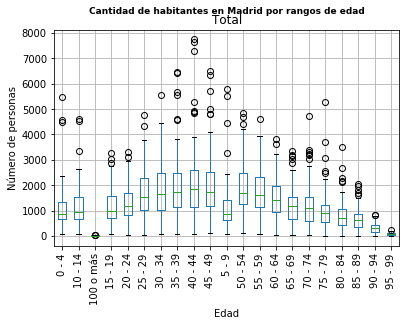

In [6]:
out = work_table.boxplot('Total', by='Edad', rot=90)
out.set_ylabel("Número de personas")

plt.suptitle('Cantidad de habitantes en Madrid por rangos de edad',
             fontsize= 9, weight="bold")

Puede comprobarse que las personas de entre los 20 a los 34 años, forman un grupo de edad de carácter más o menos homogéneo en comparación con el resto de rangos de edad (excluyendo a las personas de 95 años o más).

In [7]:
# Selección de las personas de 20 a 34 años
rangos_edades = pd.unique(work_table.Edad)
rango_edades_jovenes = np.delete(rangos_edades, [0,1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

# Selección de las personas mayores de 34 años
rango_edades_no_jovenes = np.delete(rangos_edades, [0,1,2,3,4,5,6])

El siguiente bloque de código contiene las dos funciones que se utilizarán para extraer información de la tabla *work_table*.

In [8]:
# Fuciones para consultar la tabla general y obtener información 
def seleccionar_data_por_edad(edades, col_padron, func):
    """Esta funcion únicamente sirve para agrupar datos de la tabla por categorias de edad"""
    temp_one = work_table[work_table['Edad'].isin(edades)].copy(deep=True)
    temp = temp_one.groupby(['Distrito']).agg({col_padron: func}).reset_index()
    return temp

def seleccionar_data_por_columna(columna):
    """ESta función sirve para extraer, únicamente, infomración relacioanda con las elecciones, NO utilizar con columnas
    relacioandas con el Padron"""
    temp = work_table.groupby(['Distrito', 'Barrio']).agg({columna: 'max'}).reset_index()
    temp = temp.groupby(['Distrito',]).agg({columna: 'sum'}).reset_index()
    return temp

In [9]:
# Número de personas por distrito entre los 20 y 34 años
numero_jovenes_distrito = seleccionar_data_por_edad(rango_edades_jovenes, 'Total', 'sum').sort_values('Distrito')

# Número de personas mayores de 34 años
numero_no_jovenes_distrito = seleccionar_data_por_edad(rango_edades_no_jovenes, 'Total', 'sum').sort_values('Distrito')

# Organizar los datos para graficar.
numero_jovenes_distrito['Total_adultos'] = numero_no_jovenes_distrito.Total
numero_jovenes_distrito = numero_jovenes_distrito.sort_values('Total', ascending=False)

En la siguiente gráfica se observan los resultados obtenidos. Se puede ver que según el Padron, Puente de Vallecas es el distrito con el mayor número de jóvenes, seguido por Carabalchel.

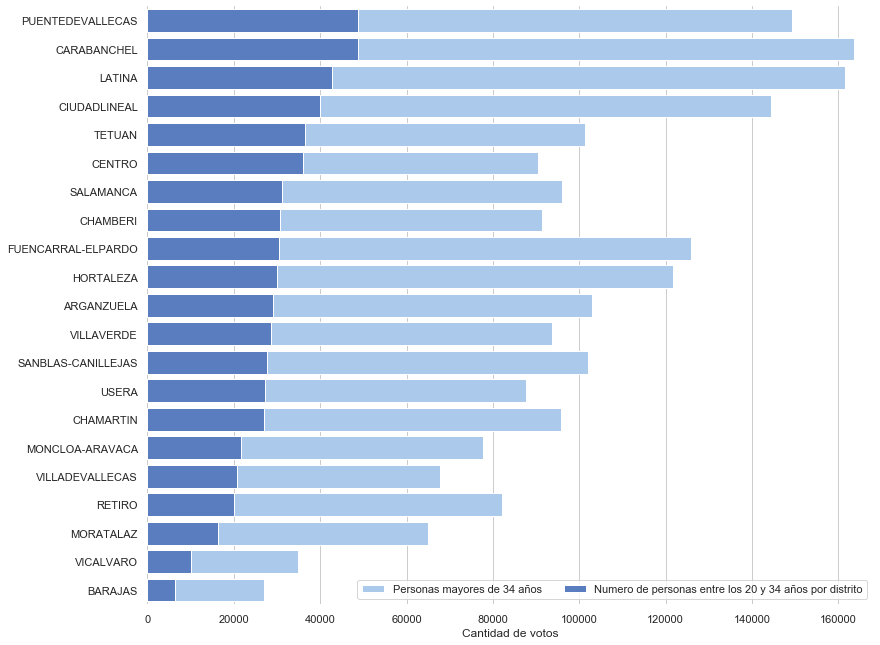

In [10]:
# Se organiza de mayor a menor.

# Se plotea la gráfica para ver los votos del PSOE por Distrito.
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Total_adultos", data=numero_jovenes_distrito,
            label="Personas mayores de 34 años", color="b")

sns.set_color_codes("muted")
q = sns.barplot(y="Distrito" , x='Total', data=numero_jovenes_distrito,
            label="Numero de personas entre los 20 y 34 años por distrito",  color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 168000), ylabel="",
       xlabel="Cantidad de votos")
sns.despine(left=True, bottom=True)

Ahora, se procede a hallar el distrito en el que el PSOE obtuvo mayor cantidad de votos, con el objetivo de graficarlo contra el número de personas jóvenes. Se espera ver que en los barrios con el mayor número de jóvenes, la votación del partido sea mayor.


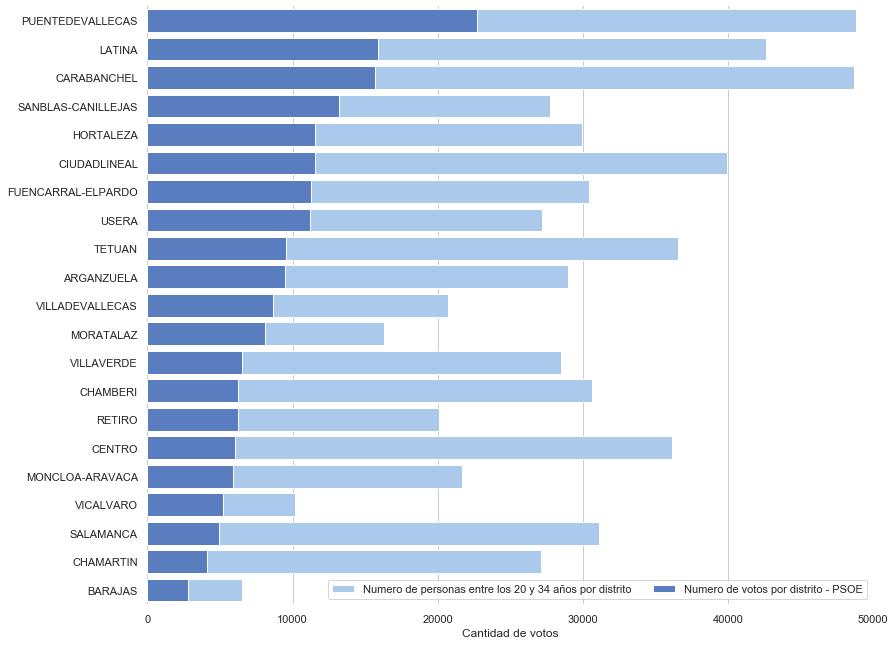

In [11]:
# Número de votos para el PSOE pror distrito
votos_psoe_distrito = seleccionar_data_por_columna('P.S.O.E.')

# Se organiza el total de votos del PSOE en orden descentente
votos_psoe_distrito = votos_psoe_distrito.sort_values('Distrito')

# Se organizan los jóvenes por distrito
numero_jovenes_distrito_new = numero_jovenes_distrito.sort_values('Distrito')
numero_jovenes_distrito_new['P.S.O.E.'] = votos_psoe_distrito['P.S.O.E.']
numero_jovenes_distrito_new = numero_jovenes_distrito_new.sort_values('P.S.O.E.', ascending=False)

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Distrito" , x="Total", data=numero_jovenes_distrito_new,
            label="Numero de personas entre los 20 y 34 años por distrito", color="b")

sns.set_color_codes("muted")
q = sns.barplot(y="Distrito" , x='P.S.O.E.', data=numero_jovenes_distrito_new,
            label="Numero de votos por distrito - PSOE",  color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 50000), ylabel="",
       xlabel="Cantidad de votos")
sns.despine(left=True, bottom=True)

Como se observa en la gráfica anterior, los barrios Puente de Vallecas, Latina y Carabanchel son los distritos con mayor número de jóvenes, y a su vez, con el mayor número de votos para el PSOE. Esto nos permite afirmar que, de alguna forma, existe una relación entre la edad y este partido político. 

Ahora, con el objetivo de ver cómo influye la población migrante en la votación por el PSOE, en los tres distritos mencionados anteriormente, se graficará la cantidad de migrantes contra los votos del PSOE.

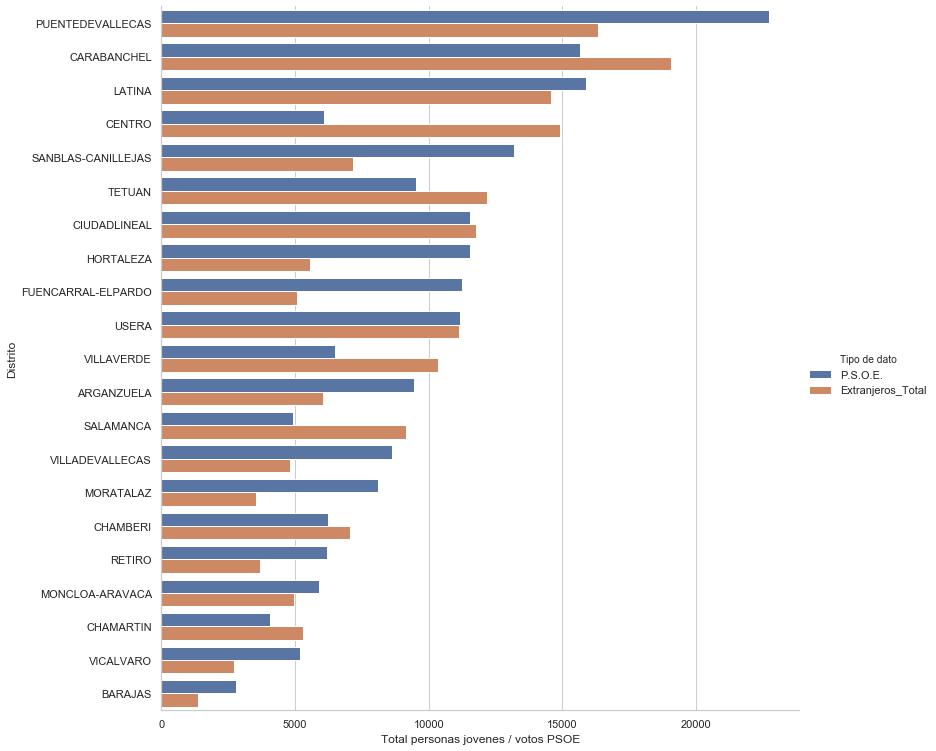

In [12]:
# Se extraen los datos de los jóvenes migrantes de la tabla
jovenes_migrantes_distrito = seleccionar_data_por_edad(rango_edades_jovenes, 
                                                       'Extranjeros_Total', 
                                                       'sum').sort_values('Distrito')

# Se agega la columna de que contiene la cantidad de votos del PSOE por distrito
jovenes_migrantes_distrito['P.S.O.E.'] = votos_psoe_distrito['P.S.O.E.']

# Se hace un melt de la tabla para graficar utilizando las dos barras una al lado de la otra
tabla_para_grafica = jovenes_migrantes_distrito.melt(id_vars='Distrito')

# Se modifican los titulos de las columnas y se organiza de mayor a menor Pot la columna 'Total'
tabla_para_grafica.columns = ['Distrito', 'Tipo de dato', 'Total']
tabla_para_grafica = tabla_para_grafica.sort_values('Total', ascending=False)

# Se plotea el resultado 
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

q = sns.catplot(y="Distrito" , x='Total', 
                hue='Tipo de dato', 
                data=tabla_para_grafica,  
                kind='bar', 
                height=10.6, aspect= 1.1)

q.set_ylabels("Distrito")
q.set_xlabels("Total personas jovenes / votos PSOE")
plt.show()

En la gráfica anterior, es posible observar que la mayoria de extranjeros jóvenes reside en Puente de Vallecas, Latina y Carabanchel. A esta lista se suma Centro con un número importante de extranjeros. Cabe aclarar que no podemos afirmar que los jóvenes que se tuvieron en cuenta para este estudio votaron por el PSOE, pues todos son libres de apoyar diferentes partidos. Únicamente, se pretende resaltar el hecho de que en los distritos con mayor número de jóvenes (tanto extranjeron como locales), el PSOE obtuvo la mayoria de sus votos. 

## Parte 2 - Análisis del voto en blanco, voto nulo y la abstención por distrito.

En esta parte se realiza un analisis de los votos en blanco, los votos nulos y la asbtención con respecto al censo electoral por distrito. El primer paso es extraer esta información de la tabla *work_table*. A continuación, se muestran los valores correspondientes a los votos nulos.

In [13]:
# Número de votos nulos por distrito y censo electoral
nulos = seleccionar_data_por_columna('Votos_nulos')
censo = seleccionar_data_por_columna('Censo_electoral')

# Se juntan las dos variables en una tabla
union_todos = censo.merge(nulos, on = ["Distrito"])

# Se crea una nueva columna con el calculo del porcentaje de votos 
union_todos['Porcentaje'] = (union_todos.Votos_nulos/union_todos.Censo_electoral)*100

Ahora, se organizan los valores de mayor a menor y se grafica el porcentaje de votos nulos con respecto a el censo electoral de cada distrito. 

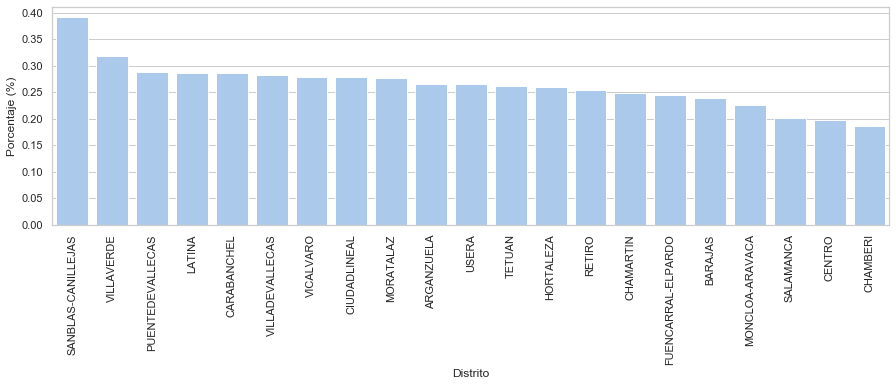

In [14]:
union_todos = union_todos.sort_values('Porcentaje', ascending=False)
union_todos 
plt.figure(figsize=(15,4))
outpct = sns.barplot(x='Distrito', y="Porcentaje", data=union_todos, color='b')
plt.xticks(rotation='vertical')
plt.ylabel('Porcentaje (%)')
plt.show()

Ahora, se repite el ejercicio para los votos en blanco. 

In [15]:
# Se seleccionan la información correspondiente a los votos en blanco
blancos = seleccionar_data_por_columna('Votos_blancos')

# Se adjunta a la tabla union_todos la información de los votos en blanco
union_todos = union_todos.merge(blancos, on = ["Distrito"])

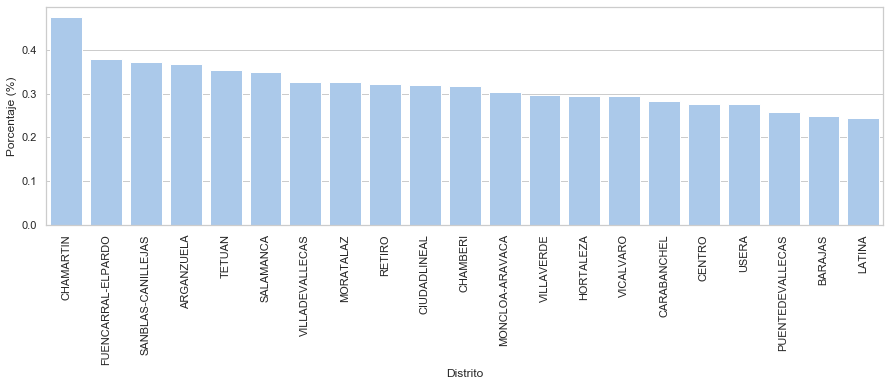

In [16]:
# Grafica del porcentaje de votos en blanco con respecto al censo electoral
union_todos['Porcentaje_blancos'] = (union_todos.Votos_blancos/union_todos.Censo_electoral)*100
union_todos = union_todos.sort_values('Porcentaje_blancos', ascending=False)
plt.figure(figsize=(15,4))
outpct = sns.barplot(x='Distrito', y="Porcentaje_blancos", data=union_todos, color='b')
plt.xticks(rotation='vertical')
plt.ylabel('Porcentaje (%)')
plt.show()

Por último, se grafica la abstención con respecto al censo electoral.

In [17]:
# Se selecciona la información correspondiente a la abstención
abstencion = seleccionar_data_por_columna('Abstención')
union_todos = union_todos.merge(abstencion, on = ["Distrito"])

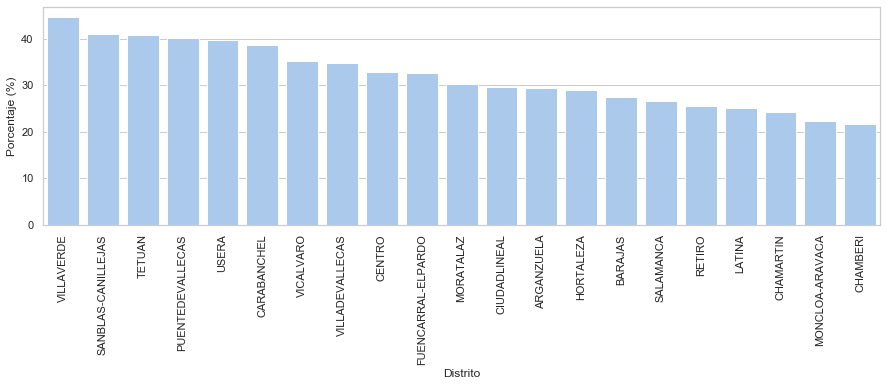

In [18]:
# Se grafia la realación
union_todos['Porcentaje_abstención'] = (union_todos.Abstención/union_todos.Censo_electoral)*100
union_todos = union_todos.sort_values('Porcentaje_abstención', ascending=False)
plt.figure(figsize=(15,4))
outpct = sns.barplot(x='Distrito', y="Porcentaje_abstención", data=union_todos, color='b')
plt.xticks(rotation='vertical')
plt.ylabel('Porcentaje (%)')
plt.show()

En la gráfica anterior se observa que en promedio la abstención esta por el orden del 30%, superando el 40 % en algunos casos.

## Parte 3 - Cómo se distribuyen las edades en el distrito que registró la mayor participación en las elecciones

En esta parte del trabajo se pretende conocer cuál es el distrito con la mayor participación en las elecciones, para luego, analizar las edades de las personas que allí residen.

El primer paso es encontrar el distrito con la mayo participación en las elecciones. 

In [19]:
# Seleccion del distrito con mayor participación
distrito_max_participation = seleccionar_data_por_columna('Total_votos_a_candidaturas')
distrito_max_participation = distrito_max_participation.sort_values('Total_votos_a_candidaturas',ascending=False)
                                                                                                   
distrito_max_participation.head()

,Distrito,Total_votos_a_candidaturas
6,CIUDADLINEAL,108045.0
2,CARABANCHEL,105024.0
9,LATINA,101062.0
8,HORTALEZA,98841.0
4,CHAMARTIN,85227.0


Se comprueba que Ciudad lineal es el distrito con mayor número de votantes. Hecho esto, el siguiente paso es extraer la información de les edades de la tabla *work_table*, dejando por fuera la pobalción menor a los 20 años. 

In [20]:
# Selección de la tabla por edad de la población. 20 años en adelante
rango_edades_habilitados_para_votar = np.delete(rangos_edades, [0,1,2,3])
tabla_habilitados_para_votar = work_table[work_table['Edad'].isin(rango_edades_habilitados_para_votar)].copy(deep=True)
tabla_habilitados_para_votar = tabla_habilitados_para_votar[tabla_habilitados_para_votar.Distrito == 'CIUDADLINEAL']
tabla_habilitados_para_votar = tabla_habilitados_para_votar.groupby('Edad').agg({'Total': 'sum'}).reset_index()
tabla_habilitados_para_votar

,Edad,Total
0,100 o más,118.0
1,20 - 24,11169.0
2,25 - 29,14161.0
3,30 - 34,14641.0
4,35 - 39,15312.0
5,40 - 44,16215.0
6,45 - 49,16233.0
7,50 - 54,16811.0
8,55 - 59,16175.0
9,60 - 64,13624.0


Como se puede ver, las personas entre los 40 y 60 años son mayoría en este distrito. 

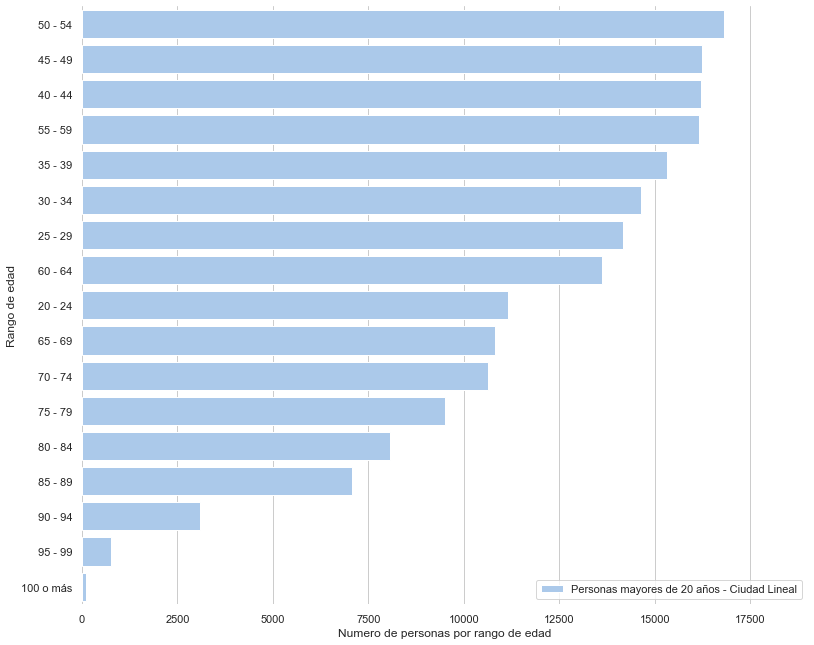

In [21]:
# Se grafica el resultado

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(13, 11))
q = sns.barplot(y="Edad" , x="Total", data=tabla_habilitados_para_votar.sort_values('Total', ascending=False),
            label="Personas mayores de 20 años - Ciudad Lineal", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 19000), ylabel="Rango de edad",
       xlabel="Numero de personas por rango de edad")
sns.despine(left=True, bottom=True)

## Parte 4 - Resultados electorales por porcentaje de migrantes.

### Votantes Vox

In [22]:
# Elimino los que no tienen edad de votar
datos_votantes = work_table[(work_table.Edad != '0 - 4')
                              & (work_table.Edad != '5 - 9')
                              & (work_table.Edad != '10 - 14')
                              & (work_table.Edad != '15 - 19')]
datos_votantes.head()

,Abstención,Barrio,CNTG+,Censo_electoral,Cs,Distrito,FE_de_las_JONS,IU-MpM,M.I.,MAS_MADRID,...,Edad,Españoles_Hombres,Españoles_Mujeres,Españoles_Total,Extranjeros_Hombres,Extranjeros_Mujeres,Extranjeros_Total,Total_Hombres,Total_Mujeres,Total
4,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,20 - 24,323.0,346.0,669.0,161.0,212.0,373.0,484.0,558.0,1042.0
5,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,25 - 29,627.0,567.0,1194.0,319.0,434.0,753.0,946.0,1001.0,1947.0
6,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,30 - 34,833.0,729.0,1562.0,309.0,357.0,666.0,1142.0,1086.0,2228.0
7,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,35 - 39,850.0,759.0,1609.0,327.0,298.0,625.0,1177.0,1057.0,2234.0
8,5379.0,PALACIO,7.0,17845.0,1622.0,CENTRO,5.0,454.0,5.0,5998.0,...,40 - 44,1002.0,826.0,1828.0,236.0,171.0,407.0,1238.0,997.0,2235.0


In [23]:
# Extraigo votantes de VOX
datos_vox = datos_votantes[['Distrito', 'Barrio', 'Censo_electoral', 'Abstención', 'Votos_nulos', 'Votos_blancos','VOX','Españoles_Total', 'Extranjeros_Total','Total']]

# Agrupo por distritos y calculo el porcentaje de extranjeros y votantes VOX
datos_vox2 = datos_vox.groupby('Distrito').agg(
    {'VOX': 'max', 'Censo_electoral': 'max', 'Españoles_Total': 'sum', 'Extranjeros_Total': 'sum', 'Total': 'sum'}).reset_index()

datos_vox3 = datos_vox2.assign(
    porcentaje_extranjeros = datos_vox2.Total / datos_vox2.Extranjeros_Total, 
    porcentaje_vox = datos_vox2.Censo_electoral / datos_vox2.VOX)

datos_vox3

datos_vox3.sort_values(['porcentaje_extranjeros'], ascending=False)

,Distrito,VOX,Censo_electoral,Españoles_Total,Extranjeros_Total,Total,porcentaje_extranjeros,porcentaje_vox
13,RETIRO,1237.0,27359.0,93269.0,8875.0,102144.0,11.509183,22.117219
7,FUENCARRAL-ELPARDO,2171.0,41495.0,142227.0,13988.0,156215.0,11.167787,19.113312
11,MORATALAZ,1061.0,22729.0,72773.0,8412.0,81185.0,9.651094,21.422243
4,CHAMARTIN,1891.0,29231.0,109757.0,13153.0,122910.0,9.344636,15.457959
0,ARGANZUELA,1407.0,30449.0,117487.0,14401.0,131888.0,9.158253,21.641080
8,HORTALEZA,2726.0,41226.0,134938.0,16811.0,151749.0,9.026768,15.123258
1,BARAJAS,945.0,15162.0,29782.0,3793.0,33575.0,8.851832,16.044444
10,MONCLOA-ARAVACA,1443.0,23044.0,87585.0,11728.0,99313.0,8.468025,15.969508
5,CHAMBERI,1382.0,21663.0,107041.0,15064.0,122105.0,8.105749,15.675109
15,SANBLAS-CANILLEJAS,1111.0,23927.0,111659.0,18015.0,129674.0,7.198113,21.536454


No podemos concluir que el porcentaje de población extranjera por distrito es proporcional a los votos que recibe el partido VOX. 
Siendo **Vicálvaro** el distrito con más extranjeros, dicho partido político tiene únicamente un 2.48%. Mientras que los distritos donde el peso de VOX es mayor, como Latina, Salamanca, Chamberí, Chamartín o Moncloa-Aravaca no se encuentran en entre los 3 barrios con menos españoles.

A continuación se muestra el número de votantes del VOX por barrio en un mapa

In [24]:
# Se extrae la información requerida
datos_vox4 = datos_vox.groupby('Barrio').agg(
    {'VOX': 'max', 'Censo_electoral': 'max', 'Españoles_Total': 'sum', 'Extranjeros_Total': 'sum', 'Total': 'sum'}).reset_index()

# Se organizan los barrios de por orden alfabetico
datos_vox4 = datos_vox4.sort_values('Barrio')

# Se arreglan los nombre de los barrios para coincidir con el archivo geojson
n = ['Abrantes',
 'Acacias',
 'Adelfas',
 'Aeropuerto',
 'Aguilas',
 'Alameda de Osuna',
 'Almagro',
 'Almenara',
 'Almendrales',
 'Aluche',
 'Ambroz',
 'Amposta',
 'Apostol Santiago',
 'Arapiles',
 'Aravaca',
 'Arcos',
 'Argüelles',
 'Atalaya',
 'Atocha',
 'Bellas Vistas',
 'Berruguete',
 'Buenavista',
 'Butarque',
 'Campamento',
 'Canillas',
 'Canillejas',
 'Casa de Campo',
 'Casco Histórico de Barajas',
 'Casco Histórico de Vallecas',
 'Casco Histórico de Vicálvaro',
 'Castellana',
 'Castilla',
 'Castillejos',
 'Chopera',
 'Ciudad Jardín',
 'Ciudad Universitaria',
 'Colina',
 'Comillas',
 'Concepción',
 'Corralejos',
 'Cortes',
 'Costillares',
 'Cuatro Caminos',
 'Cuatro Vientos',
 'Cármenes',
 'Delicias',
 'El Goloso',
 'El Pardo',
 'El Plantío',
 'El Viso',
 'Embajadores',
 'Entrevías',
 'Estrella',
 'Fontarrón',
 'Fuente del Berro',
 'Fuentelareina',
 'Gaztambide',
 'Goya',
 'Guindalera',
 'Hellín',
 'Hispanoamérica',
 'Ibiza',
 'Imperial',
 'Jerónimos',
 'Justicia',
 'La Paz',
 'Legazpi',
 'Lista',
 'Los Angeles',
 'Los Rosales',
 'Lucero',
 'Marroquina',
 'Media Legua',
 'Mirasierra',
 'Moscardó',
 'Niño Jesús',
 'Nueva España',
 'Numancia',
 'Opañel',
 'Orcasitas',
 'Orcasur',
 'Pacífico',
 'Palacio',
 'Palomas',
 'Palomeras Bajas',
 'Palomeras Sureste',
 'Palos de Moguer',
 'Pavones',
 'Peñagrande',
 'Pilar',
 'Pinar del Rey',
 'Piovera',
 'Portazgo',
 'Pradolongo',
 'Prosperidad',
 'Pueblo Nuevo',
 'Puerta Bonita',
 'Puerta del Angel',
 'Quintana',
 'Recoletos',
 'Rejas',
 'Rios Rosas',
 'Rosas',
 'Salvador',
 'San Andrés',
 'San Cristobal',
 'San Diego',
 'San Fermín',
 'San Isidro',
 'San Juan Bautista',
 'San Pascual',
 'Santa Eugenia',
 'Simancas',
 'Sol',
 'Timón',
 'Trafalgar',
 'Universidad',
 'Valdeacederas',
 'Valdefuentes',
 'Valdemarín',
 'Valdezarza',
 'Vallehermoso',
 'Valverde',
 'Ventas',
 'Vinateros',
 'Vista Alegre',
 'Zofío',
 'Na']
n.sort()

datos_vox4.Barrio =  n

datos_vox4.head()

,Barrio,VOX,Censo_electoral,Españoles_Total,Extranjeros_Total,Total
0,Abrantes,949.0,20318.0,19683.0,5681.0,25364.0
1,Acacias,1407.0,30449.0,29562.0,2426.0,31988.0
2,Adelfas,868.0,1475.0,14548.0,1202.0,15750.0
3,Aeropuerto,70.0,1244.0,1199.0,366.0,1565.0
4,Aguilas,945.0,15162.0,14712.0,1048.0,15760.0


Una vez lista la información se procede a realizar un plot sobre el mapa con la información.

In [25]:
# Folium para mapas
import folium

# Mapa base sobre Madrid
map_madrid = folium.Map(location=[40.42, -3.7], zoom_start=11)

# COROPLETAS
folium.Choropleth(
    geo_data='resources/neighbourhoods.geojson',
    data=datos_vox4,
    columns=['Barrio', 'VOX'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlGn',
    bins=[0, 200, 500, 1000, 2000, 3000],
).add_to(map_madrid)

map_madrid